<a href="https://colab.research.google.com/github/divanshu1993/security-anomalies-samples/blob/main/script_security.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **My First ML project**

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import joblib

# Step 1: Load the CSV data
data = pd.read_csv('https://raw.githubusercontent.com/divanshu1993/security-anomalies-samples/main/security%20anomalies%20threats%20samples.csv')

# Step 2: Preprocess the data (if required)
# For example, you may need to clean or normalize the text data

# Step 3: Prepare the training data
X_train = data['message'].str.lower().str.strip()
y_train = data['status']

# Step 4: Vectorize the training data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

# Step 5: Train the SVM model
svm = SVC()
svm.fit(X_train_vec, y_train)

# Step 6: Save the trained model and vectorizer for future use
joblib.dump(svm, 'anomaly_detection_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

## **Test My New Generated Model**

In [26]:
# Step 1: Install required libraries
!pip install scikit-learn

# Step 2: Import the necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
from sklearn.metrics import classification_report


# Step 3: Load the trained model and vectorizer
vectorizer = joblib.load('vectorizer.pkl')
svm = joblib.load('anomaly_detection_model.pkl')

# Step 4: Load and preprocess the test data
test_data = pd.read_csv('https://raw.githubusercontent.com/divanshu1993/security-anomalies-samples/main/fake_logs_5000.csv')
# Preprocessing steps (if required)

# Step 5: Prepare the data for testing
X_test = test_data['message'].str.lower().tolist()



# Skip rows with null first name and last name
print("len before data transformation:", len(log_data))
log_data = log_data[~(log_data['message'].astype(str).str.contains('First Name', case=False) & log_data['message'].astype(str).str.contains('null', case=False)) & ~(log_data['message'].astype(str).str.contains('Last Name', case=False) & log_data['message'].astype(str).str.contains('null', case=False))]
print("len after data transformation:", len(log_data))

# Remove timestamp, [main], INFO, and file path from log messages
cleaned_log_messages = []
for log_message in log_messages:
  cleaned_log_messages.append(log_message.split(" - ")[1])


# Step 6: Vectorize the new data using the loaded vectorizer
X_new_vec = vectorizer.transform(cleaned_log_messages)

# Step 7: Predict anomalies using the loaded model
predictions = svm.predict(X_new_vec)


# Step 8: Print the predictions
print("Predictions:", predictions)

# Step 9: Calculate and print the F1-score
true_labels = test_data['status']  # Replace 'true_label_column' with the actual column name of true labels
print('labels : ', true_labels)
report = classification_report(true_labels, predictions)
print("Classification Report:\n", report)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
len before data transformation: 3609
len after data transformation: 3609
Predictions: ['anomaly' 'anomaly' 'anomaly' ... 'anomaly' 'anomaly' 'anomaly']
labels :  0       normal
1       normal
2       normal
3       normal
4       normal
         ...  
4995    normal
4996    normal
4997    normal
4998    normal
4999    normal
Name: status, Length: 5000, dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

     anomaly       0.22      1.00      0.36      1087
      normal       0.00      0.00      0.00      3913

    accuracy                           0.22      5000
   macro avg       0.11      0.50      0.18      5000
weighted avg       0.05      0.22      0.08      5000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Testing Add User Data with Isolation Forest algo 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
len before data transformation: 5000
len after data transformation: 3609


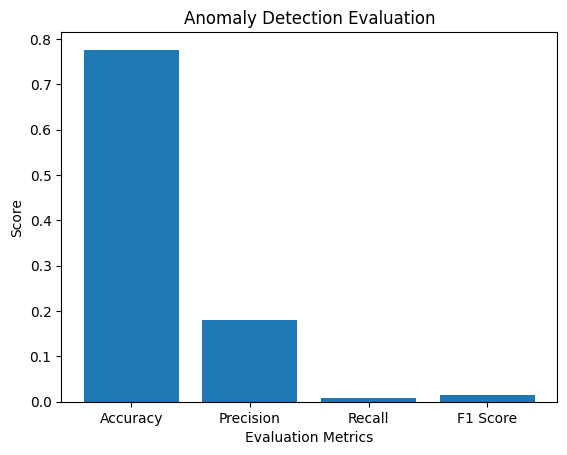

In [31]:
!pip install pandas
!pip install scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 4: Load and preprocess the test data
log_data = pd.read_csv('https://raw.githubusercontent.com/divanshu1993/security-anomalies-samples/main/fake_logs_5000.csv')
# Preprocessing steps (if required)

# Preprocess the log data and extract the log messages
log_messages = log_data['message'].tolist()
true_labels = log_data['status'].tolist()

# Skip rows with null first name and last name
print("len before data transformation:", len(log_data))
log_data = log_data[~(log_data['message'].astype(str).str.contains('First Name', case=False) & log_data['message'].astype(str).str.contains('null', case=False)) & ~(log_data['message'].astype(str).str.contains('Last Name', case=False) & log_data['message'].astype(str).str.contains('null', case=False))]
print("len after data transformation:", len(log_data))

# Remove timestamp, [main], INFO, and file path from log messages
cleaned_log_messages = []
for log_message in log_messages:
    cleaned_message = re.sub(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d+|\[\w+\]|INFO|-\s?[\/\w]+', '', log_message)
    cleaned_log_messages.append(cleaned_message.strip())

# Convert log messages to TF-IDF vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cleaned_log_messages)

# Apply Isolation Forest for anomaly detection
isolation_forest = IsolationForest(contamination=0.01)
isolation_forest.fit(X)

# Predict the anomaly scores for the log messages
anomaly_scores = isolation_forest.decision_function(X)

# Set a threshold for anomaly detection (you can adjust this as needed)
threshold = 0

# Determine the predicted labels (anomaly or normal)
predicted_labels = [1 if score >= threshold else -1 for score in anomaly_scores]

# Map true labels to numeric values (anomaly: -1, normal: 1)
true_labels_numeric = [-1 if label == "anomaly" else 1 for label in true_labels]

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels_numeric, predicted_labels)
precision = precision_score(true_labels_numeric, predicted_labels, pos_label=-1)
recall = recall_score(true_labels_numeric, predicted_labels, pos_label=-1)
f1 = f1_score(true_labels_numeric, predicted_labels, pos_label=-1)

# Plot the evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

plt.bar(metrics, scores)
plt.xlabel('Evaluation Metrics')
plt.ylabel('Score')
plt.title('Anomaly Detection Evaluation')
plt.show()


## **Testing Add User Data with KNN algo to check prediction**

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
len before data transformation: 5000
len after data transformation: 3609


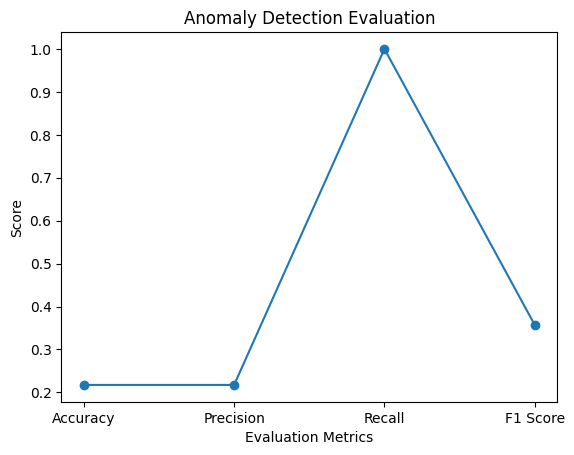

In [32]:
!pip install pandas
!pip install scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 4: Load and preprocess the test data
log_data = pd.read_csv('https://raw.githubusercontent.com/divanshu1993/security-anomalies-samples/main/fake_logs_5000.csv')
# Preprocessing steps (if required)

# Preprocess the log data and extract the log messages
log_messages = log_data['message'].tolist()
true_labels = log_data['status'].tolist()

# Skip rows with null first name and last name
print("len before data transformation:", len(log_data))
log_data = log_data[~(log_data['message'].astype(str).str.contains('First Name', case=False) & log_data['message'].astype(str).str.contains('null', case=False)) & ~(log_data['message'].astype(str).str.contains('Last Name', case=False) & log_data['message'].astype(str).str.contains('null', case=False))]
print("len after data transformation:", len(log_data))

# Remove timestamp, [main], INFO, and file path from log messages
cleaned_log_messages = []
for log_message in log_messages:
    cleaned_message = re.sub(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d+|\[\w+\]|INFO|-\s?[\/\w]+', '', log_message)
    cleaned_log_messages.append(cleaned_message.strip())

# Convert log messages to TF-IDF vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cleaned_log_messages)

# Apply KNN for anomaly detection
k = 5  # Number of neighbors to consider
knn = NearestNeighbors(n_neighbors=k)
knn.fit(X)

# Find the k nearest neighbors for each log message
distances, indices = knn.kneighbors(X)

# Set a threshold for anomaly detection (you can adjust this as needed)
threshold = 0

# Determine the predicted labels (anomaly or normal)
predicted_labels = [-1 if max(distances[i]) >= threshold else 1 for i in range(len(distances))]

# Map true labels to numeric values (anomaly: -1, normal: 1)
true_labels_numeric = [-1 if label == "anomaly" else 1 for label in true_labels]

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels_numeric, predicted_labels)
precision = precision_score(true_labels_numeric, predicted_labels, pos_label=-1)
recall = recall_score(true_labels_numeric, predicted_labels, pos_label=-1)
f1 = f1_score(true_labels_numeric, predicted_labels, pos_label=-1)

# Plot the evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

plt.plot(metrics, scores, marker='o')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Score')
plt.title('Anomaly Detection Evaluation')
plt.show()


Testing Add User with One CLass SVM algo 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
len before data transformation: 5000
len after data transformation: 3609


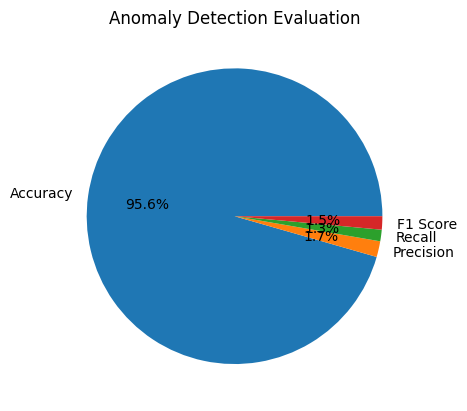

In [33]:
!pip install pandas
!pip install scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Load and preprocess the test data
log_data = pd.read_csv('https://raw.githubusercontent.com/divanshu1993/security-anomalies-samples/main/fake_logs_5000.csv')

# Preprocess the log data and extract the log messages and status
log_messages = log_data['message'].tolist()
status = log_data['status'].tolist()

# Skip rows with null first name and last name
print("len before data transformation:", len(log_data))
log_data = log_data[~(log_data['message'].astype(str).str.contains('First Name', case=False) & log_data['message'].astype(str).str.contains('null', case=False)) & ~(log_data['message'].astype(str).str.contains('Last Name', case=False) & log_data['message'].astype(str).str.contains('null', case=False))]
print("len after data transformation:", len(log_data))

# Remove timestamp, [main], INFO, and file path from log messages
cleaned_log_messages = []
for log_message in log_messages:
    cleaned_message = re.sub(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d+|\[\w+\]|INFO|-\s?[\/\w]+', '', log_message)
    cleaned_log_messages.append(cleaned_message.strip())

# Convert log messages to TF-IDF vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cleaned_log_messages)

# Apply One-Class SVM for anomaly detection
svm = OneClassSVM(nu=0.01)
svm.fit(X)

# Predict the anomaly scores for the log messages
anomaly_scores = svm.decision_function(X)

# Set a threshold for anomaly detection (you can adjust this as needed)
threshold = 0

# Determine the predicted labels (anomaly or normal)
predicted_labels = [1 if score >= threshold else -1 for score in anomaly_scores]

# Convert the status column to labels (-1 for anomaly, 1 for normal)
ground_truth_labels = [-1 if s == 'anomaly' else 1 for s in status]

# Calculate evaluation metrics
accuracy = accuracy_score(ground_truth_labels, predicted_labels)
precision = precision_score(ground_truth_labels, predicted_labels, pos_label=-1)
recall = recall_score(ground_truth_labels, predicted_labels, pos_label=-1)
f1 = f1_score(ground_truth_labels, predicted_labels, pos_label=-1)

# Create a list of labels and scores
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

# Create a pie chart
plt.pie(scores, labels=labels, autopct='%1.1f%%')
plt.title('Anomaly Detection Evaluation')

# Display the pie chart
plt.show()


Testing Add User with K Mean Clustering algo 

len before data transformation: 5000
len after data transformation: 3609


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


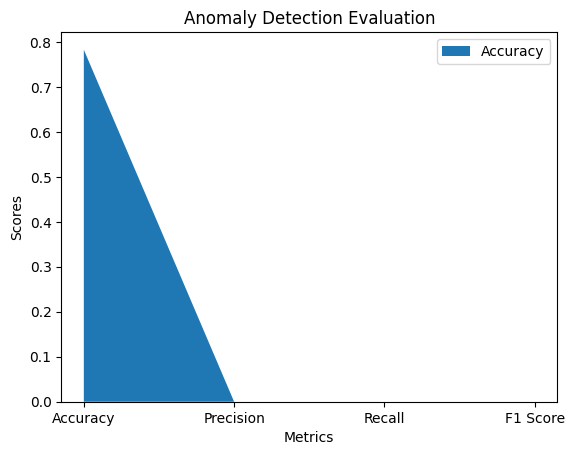

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re

# Step 4: Load and preprocess the test data
log_data = pd.read_csv('https://raw.githubusercontent.com/divanshu1993/security-anomalies-samples/main/fake_logs_5000.csv')

# Extract the log messages and status from the log_data DataFrame
log_messages = log_data['message'].tolist()
status_labels = log_data['status'].tolist()

# Skip rows with null first name and last name
print("len before data transformation:", len(log_data))
log_data = log_data[~(log_data['message'].astype(str).str.contains('First Name', case=False) & log_data['message'].astype(str).str.contains('null', case=False)) & ~(log_data['message'].astype(str).str.contains('Last Name', case=False) & log_data['message'].astype(str).str.contains('null', case=False))]
print("len after data transformation:", len(log_data))

# Remove timestamp, [main], INFO, and file path from log messages
cleaned_log_messages = []
for log_message in log_messages:
    cleaned_message = re.sub(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d+|\[\w+\]|INFO|-\s?[\/\w]+', '', log_message)
    cleaned_log_messages.append(cleaned_message.strip())

# Convert log messages to TF-IDF vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cleaned_log_messages)

# Apply K-means clustering for anomaly detection
kmeans = KMeans(n_clusters=2)  # Assuming 2 clusters, one for normal data and one for anomalies
kmeans.fit(X)

# Get the cluster labels for the log messages
cluster_labels = kmeans.labels_

# Map the status labels to the cluster labels
status_mapping = {status: label for status, label in zip(status_labels, cluster_labels)}

# Determine the predicted labels (anomaly or normal)
predicted_labels = [-1 if status == 'anomaly' else 1 for status in status_labels]

# Assume all log messages are normal
ground_truth_labels = [1] * len(cleaned_log_messages)

# Calculate evaluation metrics
accuracy = accuracy_score(ground_truth_labels, predicted_labels)
precision = precision_score(ground_truth_labels, predicted_labels, pos_label=-1)
recall = recall_score(ground_truth_labels, predicted_labels, pos_label=-1)
f1 = f1_score(ground_truth_labels, predicted_labels, pos_label=-1)

# Create a list of labels and scores
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

# Create an area chart
plt.stackplot(labels, scores, labels=labels)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Anomaly Detection Evaluation')
plt.legend()

# Display the area chart
plt.show()


## **Generate Fake content for add users**

In [20]:
!pip install faker
import csv
from faker import Faker
import random

fake = Faker('en_IN')

# Open the CSV file in write mode
with open('fake_logs_5000.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["message", "status"])  # Add the "status" column header
    for _ in range(5000):
        date_time = fake.date_time_this_year()
        # Generate empty first name for some entries
        if random.random() <= 0.1:  # Adjust the probability as needed
            first_name = 'null'
        else:
            first_name = fake.first_name()
        
        # Generate last name with <script></script> tags for some entries
        if random.random() <= 0.1:  # Adjust the probability as needed
            last_name = 'null'
        elif random.random() <= 0.2:  # Adjust the probability as needed
            last_name = 'CONNECT 172.65.27.22 HOME'
        elif random.random() <= 0.1:  # Adjust the probability as needed
            last_name = '<IMG src=".."/>'
        else:
            last_name = fake.last_name()

        if random.random() <= 0.1:  # Adjust the probability as needed
            last_name = 'null'
            first_name = 'null'


        email = fake.email()
        age = fake.random_int(min=18, max=70)
        log_entry = f"{date_time} [main] INFO com.example.UserService - Adding a new user: First Name={first_name}, Last Name={last_name}, Email={email}, Age={age}"
        
        # Determine the status based on the conditions
        if "<IMG" in last_name or "CONNECT" in last_name:
            status = "anomaly"
        else:
            status = "normal"
        
        # Write the log entry and status as a row in the CSV file
        writer.writerow([log_entry, status])

# Print a message to indicate that the CSV file has been generated
print("CSV file generated successfully!")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.0 MB/s eta 0:00:00
CSV file generated successfully!
